# **Regressione Logistica (Logit)**


## **1. Modello Matematico della Regressione Logistica**
La **Regressione Logistica** è un modello di classificazione che prevede la probabilità di appartenenza a una classe.

La funzione di probabilità è definita dalla **sigmoide**:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$


Dove:

$$
z = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n
$$

La probabilità di appartenenza alla classe $ y = 1 $ è:

$$
P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \cdots + \beta_n x_n)}}
$$




## **2. Implementazione in Python**
### **2.1 Generazione di dati sintetici**


In [1]:
%pip install numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

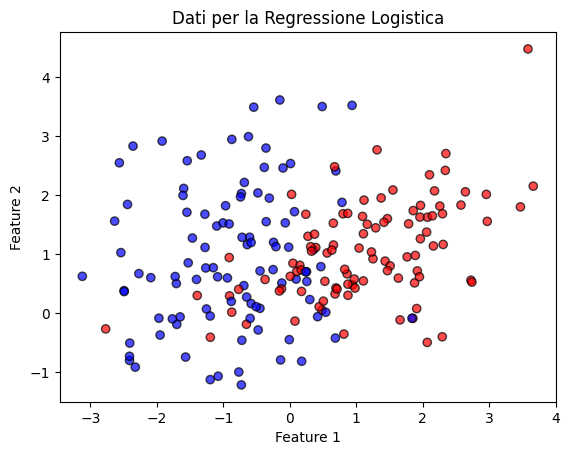

In [7]:

# Generiamo dati sintetici
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=42, n_clusters_per_class=1)

# Suddivisione dei dati in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualizziamo i dati
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k", alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Dati per la Regressione Logistica")
plt.show()


### **2.2 Addestramento del Modello**

In [8]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Creiamo il modello di regressione logistica
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predizioni sul test set
y_pred = log_model.predict(X_test)

# Valutazione delle prestazioni
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuratezza del modello: {accuracy:.2f}")


Accuratezza del modello: 0.87


### **2.3 Matrice di Confusione**

Matrice di Confusione:
[[27  7]
 [ 1 25]]


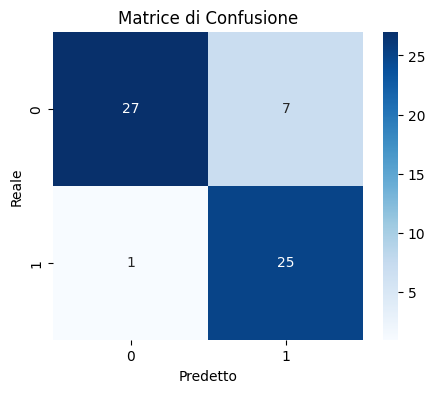

In [9]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Creazione della matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)

print("Matrice di Confusione:")
print(conf_matrix)

# Visualizziamo la matrice di confusione
plt.figure(figsize=(5,4))
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione")
plt.show()


### **2.4 Curve di Decisione e Confini**

In [ ]:

# Visualizzazione della frontiera di decisione
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Calcoliamo le probabilità per ogni punto della griglia
Z = log_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="bwr")
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap="bwr")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Frontiera di Decisione della Regressione Logistica")
plt.show()


## **3. Valutazione del Modello**

### **3.1 Precisione, Recall e F1-Score**

In [ ]:

from sklearn.metrics import classification_report

print("Report di Classificazione:")
print(classification_report(y_test, y_pred))



## **4. Conclusioni**
- La **Regressione Logistica** è un modello di **classificazione binaria** che prevede la probabilità di appartenenza a una classe usando la **funzione sigmoide**.
- I **coefficienti** sono stimati tramite **massima verosimiglianza**.
- Le **metriche di valutazione** includono **accuratezza, precisione, recall e F1-score**.
- Il **confine decisionale** può essere visualizzato per analizzare il comportamento del modello.
